<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> Low level implementation of a solution by gradient descent. Basic and stochastic approach.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [1]:
import numpy as np
import sys

sys.path.append('..')
import fidle.pwk as pwk

from modules.RegressionCooker import RegressionCooker 

# ---- Init Fidle stuffs
#
datasets_dir = pwk.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(pwk)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0
Notebook id          : GRAD1
Run time             : Thursday 14 January 2021, 08:11:03
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/datasets/fidle
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Thursday 14 January 2021, 08:11:03


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


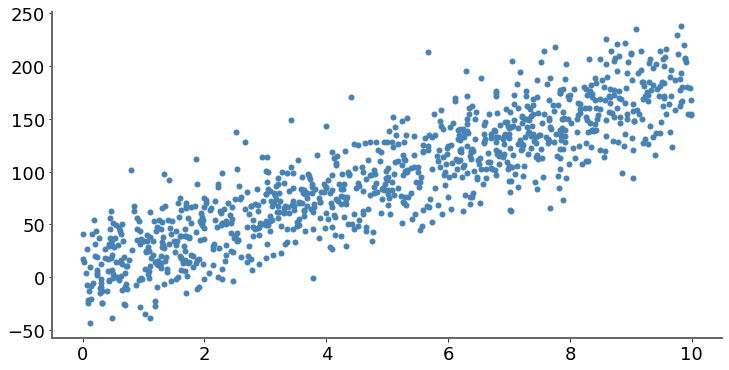

X                :      mean=   5.000  std=   2.887    min=   0.000    max=  10.000
Y                :      mean=  94.953  std=  58.567    min=-100.958    max= 286.268


In [2]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [3]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   5.000  std=   2.887    min=   0.000    max=  10.000
X normalized     :      mean=   0.000  std=   1.000    min=  -1.732    max=   1.732


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +12.189   -6.690  -1.775   -3.278  +0.018


   20   +5.551   -4.466  -1.185   -2.189  +0.307


   40   +2.592   -2.982  -0.791   -1.461  +0.500
   60   +1.273   -1.991  -0.528   -0.975  +0.629

   80   +0.685   -1.329  -0.353   -0.651  +0.715


  100   +0.423   -0.887  -0.235   -0.435  +0.772
  120   +0.306   -0.592  -0.157   -0.290  +0.810


  140   +0.254   -0.395  -0.105   -0.194  +0.836


  160   +0.231   -0.264  -0.070   -0.129  +0.853
  180   +0.221   -0.176  -0.047   -0.086  +0.865


  200   +0.216   -0.118  -0.031   -0.058  +0.872


<br>**Visualization :**

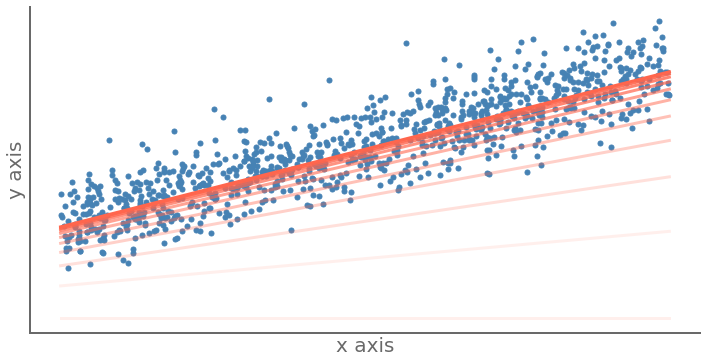

<br>**Loss :**

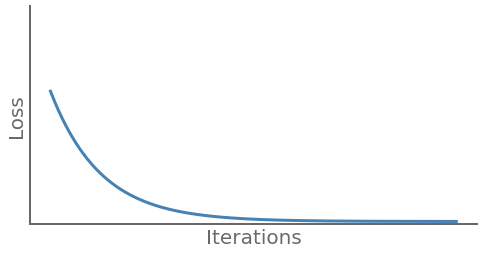

In [4]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.314   -7.285  -4.722   -0.016  +0.877
    1   +0.127   -0.315  +1.544   +0.024  +0.852
    2   +0.276   -1.804  +2.065   +0.025  +0.851
    3   +0.196   +2.278  -0.588   -0.005  +0.855
    4   +0.125   -0.103  +0.501   -0.012  +0.861
    5   +0.261   -2.193  -1.318   -0.019  +0.862
    6   +0.189   -1.075  -5.843   -0.015  +0.870
    7   +0.135   -0.662  -5.560   -0.023  +0.873
    8   +0.243   +5.518  -4.847   -0.012  +0.872
    9   +0.170   +3.961  -1.732   -0.005  +0.888


<br>**Visualization :**

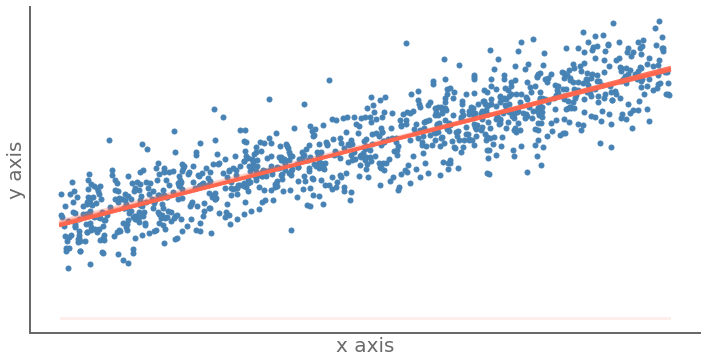

<br>**Loss :**

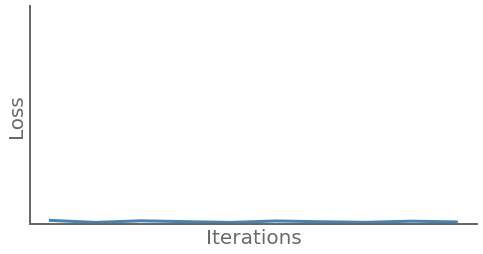

In [5]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [6]:
pwk.end()

End time is : Thursday 14 January 2021, 08:11:06
Duration is : 00:00:04 672ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>